# Spotify Features — Dataset Summary

This notebook analyzes the Spotify audio-features dataset saved as `SpotifyFeatures.csv`.

High-level summary
- Source file: `SpotifyFeatures.csv` (local CSV in the same folder).
- Content: one row per track, with metadata (track name, artist, genre) and numeric audio features produced by audio analysis (tempo, energy, danceability, valence, loudness, etc.).
- Typical use-cases: exploratory data analysis, visualization of audio features, clustering of tracks by audio profile, and supervised tasks such as predicting track popularity.

What to expect in this notebook
- The CSV is loaded into a DataFrame named `df`.
- We perform basic cleaning (drop duplicates) and create a derived `duration_min` column from `duration_ms`.
- Visualizations include distributions (popularity), top artists, correlation heatmap and feature scatterplots.

Success criteria for dataset checks
- No unexpected nulls in required columns (or they are handled explicitly).
- Duplicate rows removed.
- Numeric features are in expected ranges (e.g., danceability/energy/valence in [0,1], tempo in BPM, popularity in 0–100).

Notes / assumptions
- This summary explains the columns used by the notebook; the CSV may include additional fields not referenced below.


In [ ]:
%pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
df = pd.read_csv(r"SpotifyFeatures.csv")
df.head()
df.info()
df.isnull().sum()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acousticness  danceability  \
0       0BRjO6ga9RKCKjfDqeFgWV           0       0.61100         0.389   
1       0BjC1NfoEOOusryehmNudP           1       0.24600         0.590   
2       0CoSDzoNIKCRs124s9uTVy           3       0.95200         0.663   
3       0Gc6TVm52BwZD07Ki6tIvf           0       0.70300         0.240   
4       0IuslXpMROHdEPvSl1fTQK           4       0.95000         0.331   
...                        ...         ...           ...           ...   
232720  2XGLdVl7lGeq8ksM6Al7jT          39       0.00384         0.687   
232721  1qWZdkBl4UVPj9lK6HuuFM          38       0.03290         0.785   
232722  2ziWXUmQLrXTiYjCg2fZ2t          47       0.90100         0.517   
232723  6EFsue2YbIG4Qkq8Zr9Rir          44       0.26200         0.745   
232724  34XO9RwPMKjbvRry54QzWn          35       0.09730         0.758   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0             99373   0.910          0.000000  C#    0.3460    -1.828  Major   
1            137373   0.737          0.000000  F#    0.1510    -5.559  Minor   
2            170267   0.131          0.000000   C    0.1030   -13.879  Minor   
3            152427   0.326          0.000000  C#    0.0985   -12.178  Major   
4             82625   0.225          0.123000   F    0.2020   -21.150  Major   
...             ...     ...               ...  ..       ...       ...    ...   
232720       326240   0.714          0.544000   D    0.0845   -10.626  Major   
232721       282447   0.683          0.000880   E    0.2370    -6.944  Minor   
232722       166960   0.419          0.000000   D    0.0945    -8.282  Major   
232723       222442   0.704          0.000000   A    0.3330    -7.137  Major   
232724       323027   0.470          0.000049  G#    0.0836    -6.708  Minor   

        speechiness    tempo time_signature  valence  
0            0.0525  166.969            4/4    0.814  
1            0.0868  174.003            4/4    0.816  
2            0.0362   99.488            5/4    0.368  
3            0.0395  171.758            4/4    0.227  
4            0.0456  140.576            4/4    0.390  
...             ...      ...            ...      ...  
232720       0.0316  115.542            4/4    0.962  
232721       0.0337  113.830            4/4    0.969  
232722       0.1480   84.135            4/4    0.813  
232723       0.1460  100.031            4/4    0.489  
232724       0.0287  113.897            4/4    0.479  

[232725 rows x 18 columns]


**Column explanations and recommended preprocessing**

- `track_id` (string): unique identifier for the track. Keep for joins or de-dup checks.
- `track_name` / `artist_name` (string): human-readable metadata; useful for labeling plots and grouping. Consider normalizing or lowercasing if performing text grouping.
- `genre` (categorical): music genre; may need consolidation (e.g., many fine-grained genres) and encoding (one-hot or target encoding) for modeling.
- `popularity` (integer 0–100): Spotify's popularity score — commonly used as a target variable for prediction tasks. Check distribution and consider binning for classification tasks.
- `duration_ms` (integer): duration in milliseconds; converted in this notebook to `duration_min` for readability. Watch for outliers.
- `danceability`, `energy`, `valence`, `acousticness`, `instrumentalness`, `liveness`, `speechiness` (float, typically 0.0–1.0): audio features in normalized scales. Verify min/max to confirm no unexpected values; these are great model features.
- `tempo` (float): beats per minute (BPM). Typical range varies widely; consider log transform or scaling if skewed.
- `loudness` (float, typically negative dB values): measure in dB; often needs scaling.
- `key` (int 0–11) and `mode` (0 or 1): represent musical key and mode; treat as categorical or cyclic features depending on model.

Recommended preprocessing checklist
1. Inspect and handle missing values (df.isnull().sum()).
2. Confirm and remove duplicates (df.drop_duplicates()).
3. Convert `duration_ms` to minutes (already done as `duration_min`).
4. Standardize/scale numeric features before modeling (StandardScaler or MinMaxScaler).
5. Encode categorical fields (genre, key, mode) — prefer one-hot or target encoding depending on model and cardinality.
6. Consider feature selection or dimensionality reduction (PCA) when using many correlated audio features.

Quick notes on modeling targets
- Popularity is natural target for regression. For classification, you can bin popularity (e.g., low/medium/high).
- Alternatively, cluster tracks on audio features to find groups of sonically similar songs.

If you want, I can also add a small code cell that prints `df.shape`, `df.describe()` and `df.columns` next to the loading cell to make inspection explicit.

In [ ]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [ ]:
# use pandas to handle datetime conversions (pandas is already imported as pd)
df.drop_duplicates(inplace=True)
df
# convert the duration column from milliseconds to minutes

df['duration_min'] = (df['duration_ms'] / 60000).round(2)
df['duration_min'].head()



0    1.66
1    2.29
2    2.84
3    2.54
4    1.38
Name: duration_min, dtype: float64

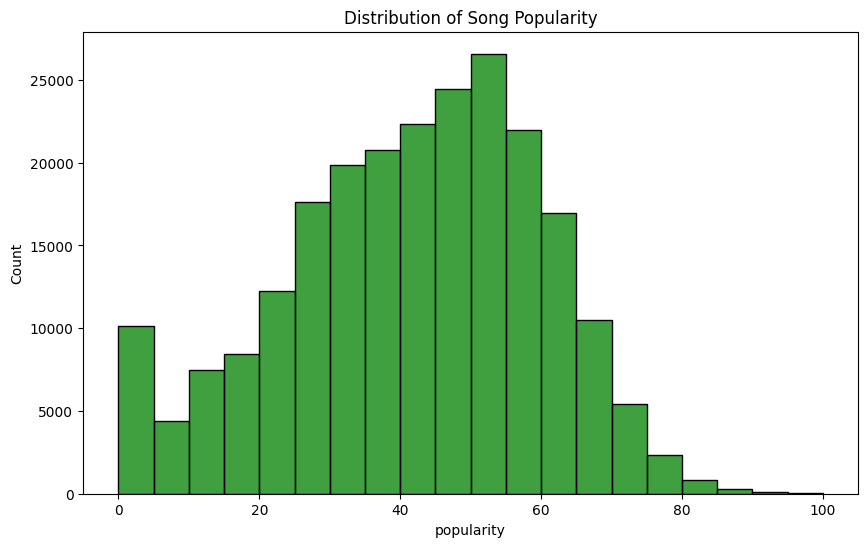

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], bins=20, color='green')
plt.title("Distribution of Song Popularity")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12328\755586025.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




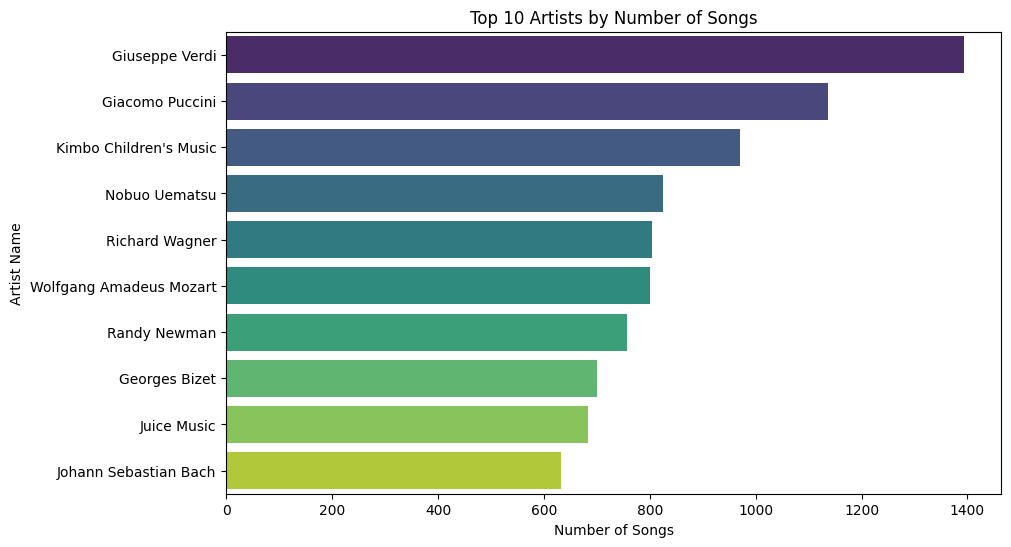

In [ ]:
top_artists = df['artist_name'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title("Top 10 Artists by Number of Songs")
plt.xlabel("Number of Songs")
plt.ylabel("Artist Name")
plt.show()

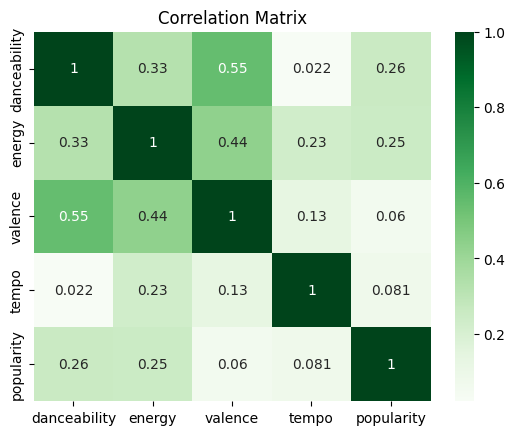

<Figure size 1000x1000 with 0 Axes>

In [ ]:
corr = df[['danceability','energy','valence','tempo','popularity']].corr()
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title("Correlation Matrix")
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
px.scatter(df, x='tempo', y='energy', color='popularity', 
           title='Tempo vs Energy with Popularity')


In [ ]:
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).reset_index()

px.bar(genre_popularity, x='genre', y='popularity',
       title='Average Popularity by Genre',
       color='popularity',
       color_continuous_scale='greens')
